# September 19, 2022: Check how csplines behave when stimulus is synchronized with the TR duration,
in turn affecting the columns in the design matrix.

Did this along with Songtao.

In [1]:
import os
import sys
import numpy as np

# plotting
import matplotlib.pyplot as plt
plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

import cmasher as cmr #CITE ITS PAPER IN YOUR MANUSCRIPT

++ 3dDeconvolve: AFNI version=AFNI_20.2.18 (Sep 17 2020) [64-bit]
++ Authored by: B. Douglas Ward, et al.
++ using TR=1.25 seconds for -stim_times and -nodata
++ using NT=100 time points for -nodata
++ Imaging duration=125.0 s; Automatic polort=1
++ -stim_times using TR=1.25 s for stimulus timing conversion
++ -stim_times using TR=1.25 s for any -iresp output datasets
++  [you can alter the -iresp TR via the -TR_times option]
++ -stim_times 1 using LOCAL times
++ Number of time points: 100 (no censoring)
 + Number of parameters:  15 [2 baseline ; 13 signal]
++ Wrote matrix values to file ./Simul-ABA_full.x1D
++ ----- Signal+Baseline matrix condition [X] (100x15):  1.46752  ++ VERY GOOD ++
*+ WARNING: !! in Signal+Baseline matrix:
 * Largest singular value=1.42424
 * 1 singular value is less than cutoff=1.42424e-07
 * Implies strong collinearity in the matrix columns! 
++ Signal+Baseline matrix singular values:
             0      0.661322      0.713662      0.730494      0.821583
     

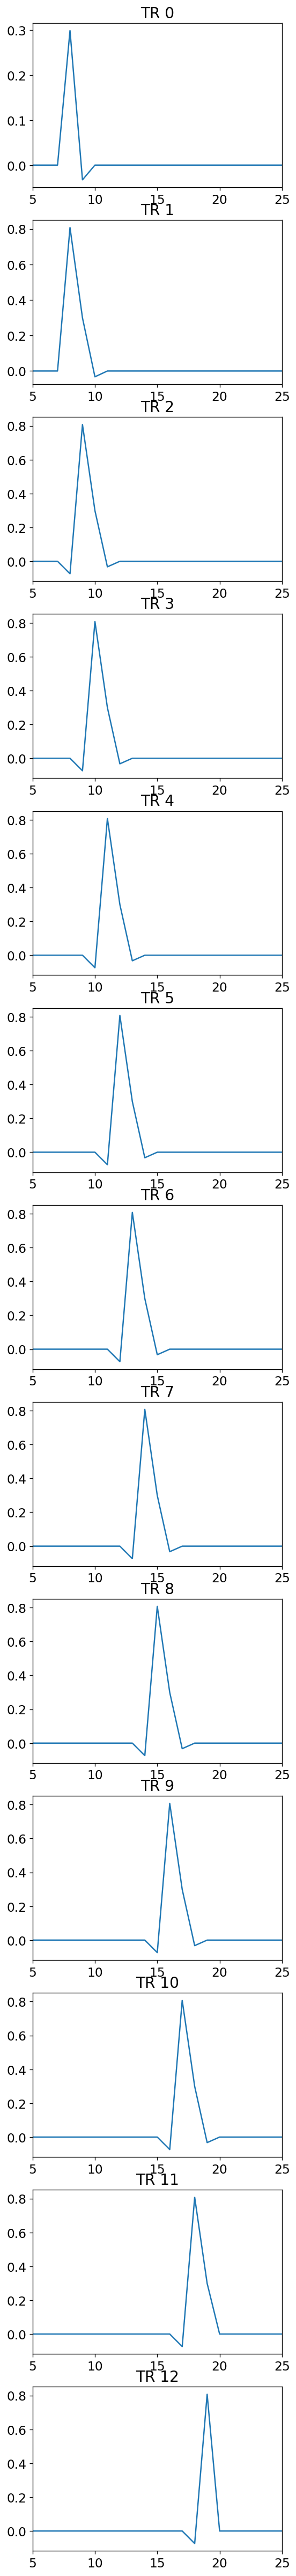

In [2]:
'''
as seen in the cspline plots, if the stimulus timing is NOT synchronized with the TR duration,
csplines intersect resulting in peaks surrounded by negative troughs => collinearity.
This is the case in ABA paradigm.
'''
sync = 'no'
os.system(
    (
        f"./05-check_afni_glm.sh {sync}"
    )
)

design_mat_file = f"/home/govindas/network_dynamics/nb/sep22/Simul-ABA_full.x1D"

design_mat = np.loadtxt(design_mat_file)[:, 2:]

fig, axs = plt.subplots(nrows=13, ncols=1, figsize=(5*1, 4*13), dpi=120)
for idx in range(13):
    ax = axs[idx]

    ax.plot(design_mat[:, idx])
    ax.set_xlim(5, 25)
    ax.set_title(f"TR {idx}")

++ 3dDeconvolve: AFNI version=AFNI_20.2.18 (Sep 17 2020) [64-bit]
++ Authored by: B. Douglas Ward, et al.
++ using TR=1.25 seconds for -stim_times and -nodata
++ using NT=100 time points for -nodata
++ Imaging duration=125.0 s; Automatic polort=1
++ -stim_times using TR=1.25 s for stimulus timing conversion
++ -stim_times using TR=1.25 s for any -iresp output datasets
++  [you can alter the -iresp TR via the -TR_times option]
++ -stim_times 1 using LOCAL times
++ Number of time points: 100 (no censoring)
 + Number of parameters:  15 [2 baseline ; 13 signal]
++ Wrote matrix values to file ./Simul-ABA_full.x1D
++ ----- Signal+Baseline matrix condition [X] (100x15):  1.38505  ++ VERY GOOD ++
++ ----- Signal-only matrix condition [X] (100x13):  1  ++ VERY GOOD ++
++ ----- Baseline-only matrix condition [X] (100x2):  1  ++ VERY GOOD ++
++ ----- polort-only matrix condition [X] (100x2):  1  ++ VERY GOOD ++
++ 3dDeconvolve exits: -x1D_stop option was invoked


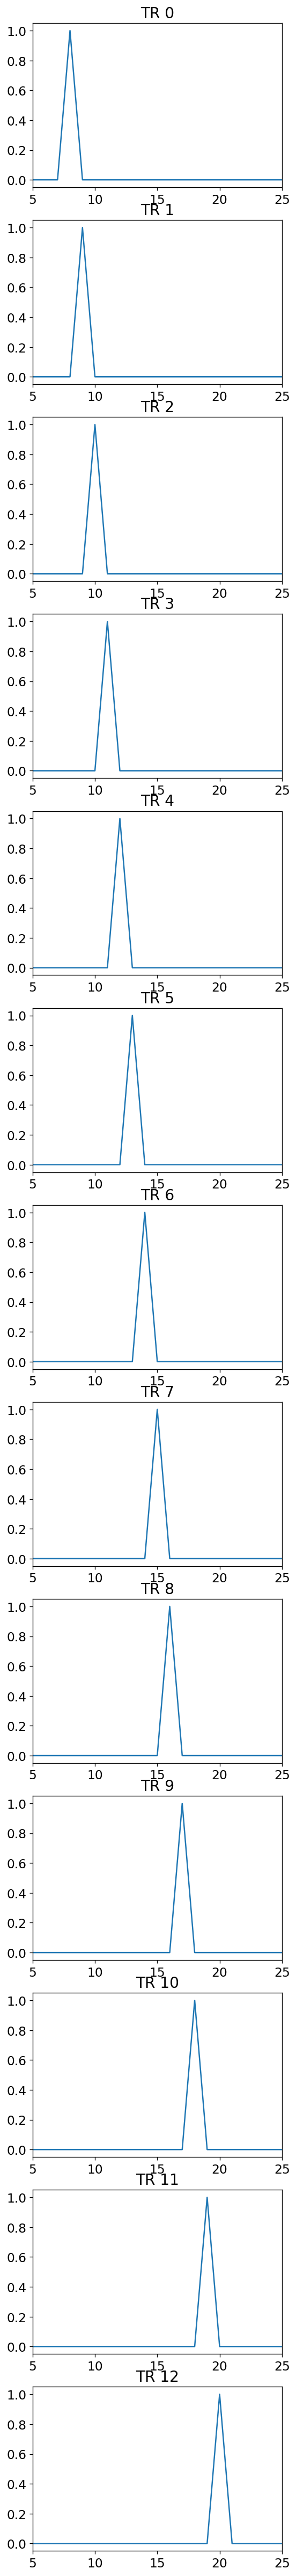

In [3]:
'''
as seen in the cspline plots, if the stimulus timing is synchronized with the TR duration,
csplines do NOT intersect resulting in Kronecker delta signals => no collinearity.
This is the case in MAX paradigm.
'''
sync = 'yes'
os.system(
    (
        f"./05-check_afni_glm.sh {sync}"
    )
)

design_mat_file = f"/home/govindas/network_dynamics/nb/sep22/Simul-ABA_full.x1D"

design_mat = np.loadtxt(design_mat_file)[:, 2:]

fig, axs = plt.subplots(nrows=13, ncols=1, figsize=(5*1, 4*13), dpi=120)
for idx in range(13):
    ax = axs[idx]

    ax.plot(design_mat[:, idx])
    ax.set_xlim(5, 25)
    ax.set_title(f"TR {idx}")